In [120]:
"""
Upload the necessary libraries
:pandas - for data manipulation and analysis
:numpy - for numerical operations 
:matplotlib - for plotting analysis of the data
:seaborn - for plotting analysis of the data
:sklearn - for predictions and creating machine learning models 
:plotly - for interactive plotting and visualization
:xgboost - for gradient boosting algorithms
:warnings - for managing warning messages
"""

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [121]:
# read the data form csv file 
df_read = pd.read_csv("insurance.csv")

# information about shape of the data frame 
print(df_read.shape)

# information about head of the data frame 
print(df_read.head)

(1338, 7)
<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


In [122]:
# check that the data frame contains empty fields
df_read.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [123]:
# print the information about data frame - columns, types of data 
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [124]:
# count, mean, max, etc of the data frame
df_read.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [125]:
# replacing categorical values with numerical values
new_data = {
    'sex': {'male': 0, 'female': 1},
    'smoker': {'no': 0, 'yes': 1},
    'region': {'northwest': 1, 'northeast': 2, 'southeast': 3, 'southwest': 4}
}

# copy original DataFrame
df_copy = df_read.copy()

# replace categorical values with numerical values
df_copy.replace(new_data, inplace = True)

print(df_copy)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       4  16884.92400
1      18    0  33.770         1       0       3   1725.55230
2      28    0  33.000         3       0       3   4449.46200
3      33    0  22.705         0       0       1  21984.47061
4      32    0  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       1  10600.54830
1334   18    1  31.920         0       0       2   2205.98080
1335   18    1  36.850         0       0       3   1629.83350
1336   21    1  25.800         0       0       4   2007.94500
1337   61    1  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


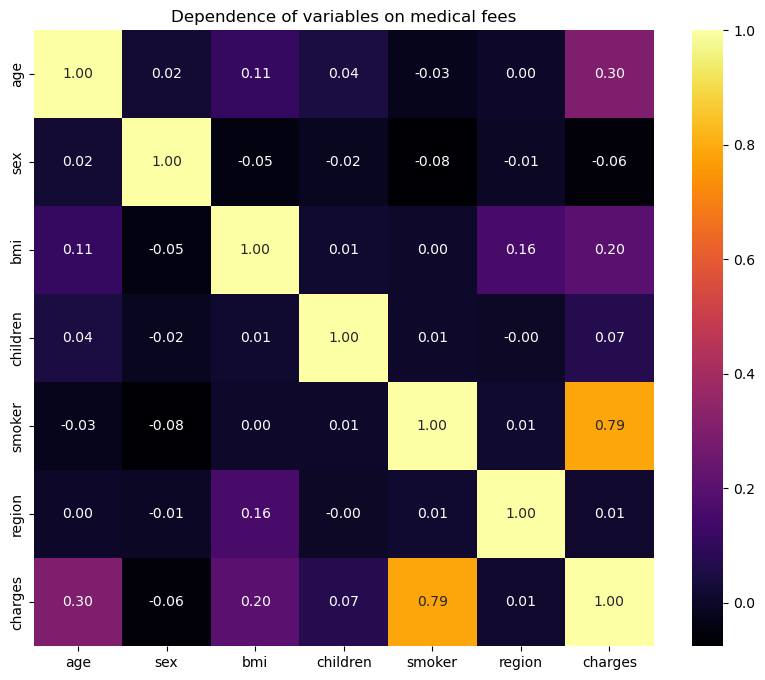

In [126]:
# create correlation matrix
correlation = df_copy.corr()
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(correlation, cmap = 'inferno', annot = True, fmt = ".2f", ax = ax)
plt.title("Dependence of variables on medical fees")
plt.show()


In [127]:
# show data with type 'object' and information about 
df_read.select_dtypes(include = ['object']).describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [128]:
# show tables for each variable (sex, smoker  and region) number of insured and average amount 
create_table = df_read.select_dtypes(include = ['object']).columns.tolist()
for i in create_table:
    obs = df_read[i].value_counts()
    avg_claim = df_read.groupby(i)["charges"].mean()
    display(pd.DataFrame({"Number of insured" : obs, "Average amount" : avg_claim.map('${:,.2f}'.format)})\
            .sort_values('Number of insured', ascending = False)\
            .style.set_caption("Variable: {}".format(i)))

,Number of insured,Average amount
sex,,
male,676,"$13,956.75"
female,662,"$12,569.58"


,Number of insured,Average amount
smoker,,
no,1064,"$8,434.27"
yes,274,"$32,050.23"


,Number of insured,Average amount
region,,
southeast,364,"$14,735.41"
northwest,325,"$12,417.58"
southwest,325,"$12,346.94"
northeast,324,"$13,406.38"


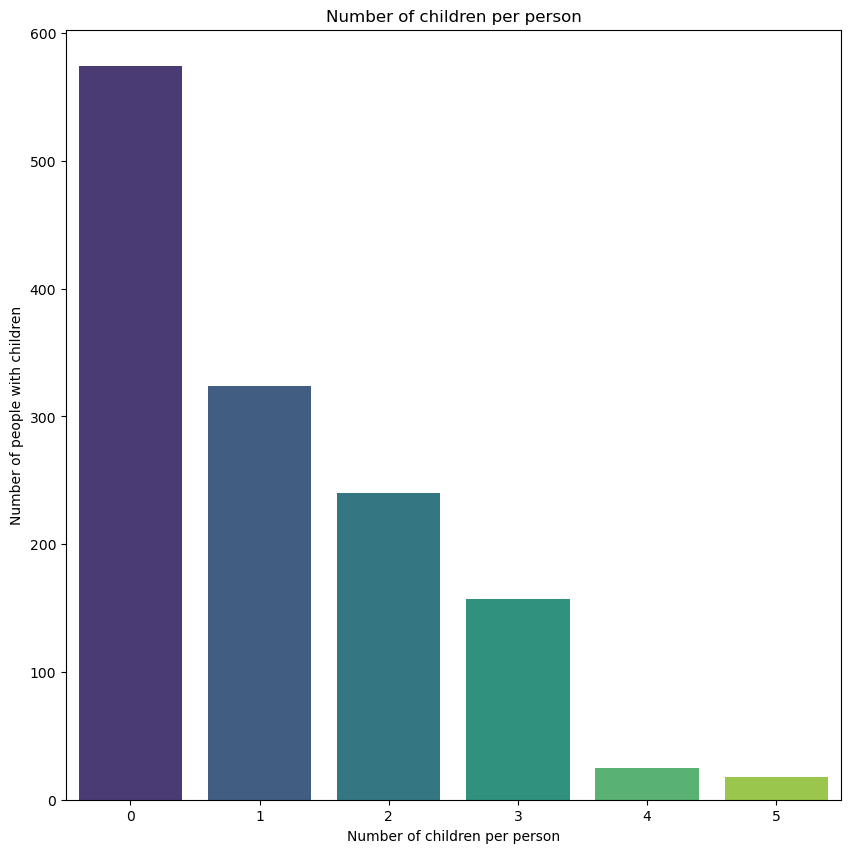

In [129]:
# create plot -  number of children per person
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.countplot(x = df_read['children'], palette = 'viridis')
plt.title('Number of children per person')
plt.xlabel('Number of children per person')
plt.ylabel('Number of people with children')

plt.show()

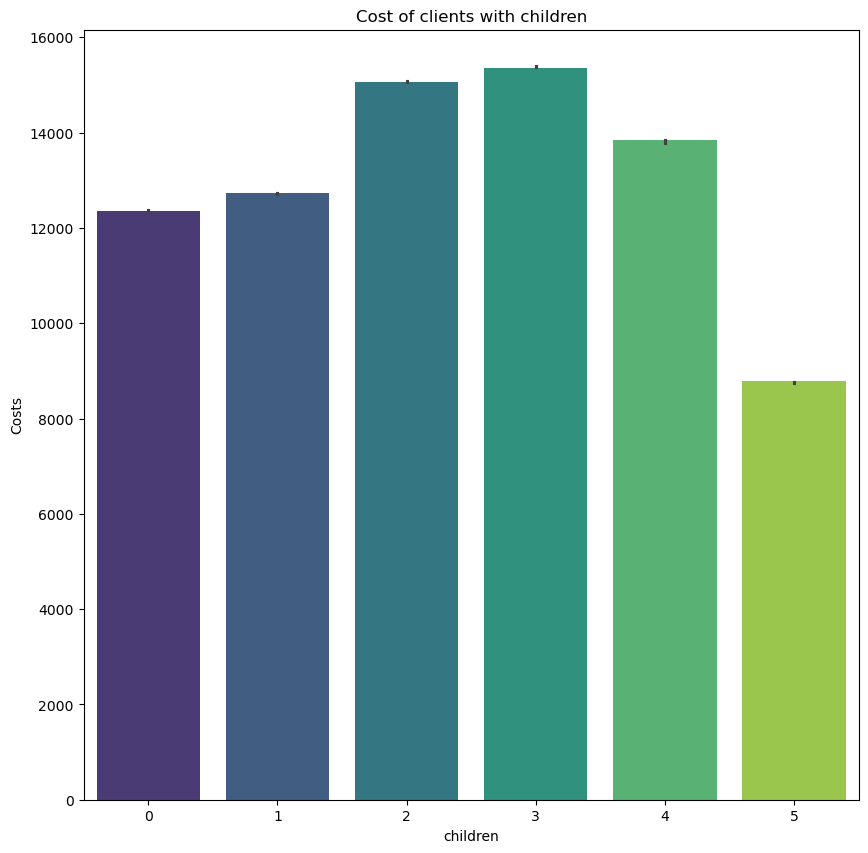

In [130]:
# create plot - cost of clients with children
fig, ax = plt.subplots(figsize = (10, 10))
sns.barplot(x = df_read['children'], y = df_read['charges'], ci = 1, palette ='viridis')
plt.ylabel('Costs')
plt.title('Cost of clients with children')
plt.show()

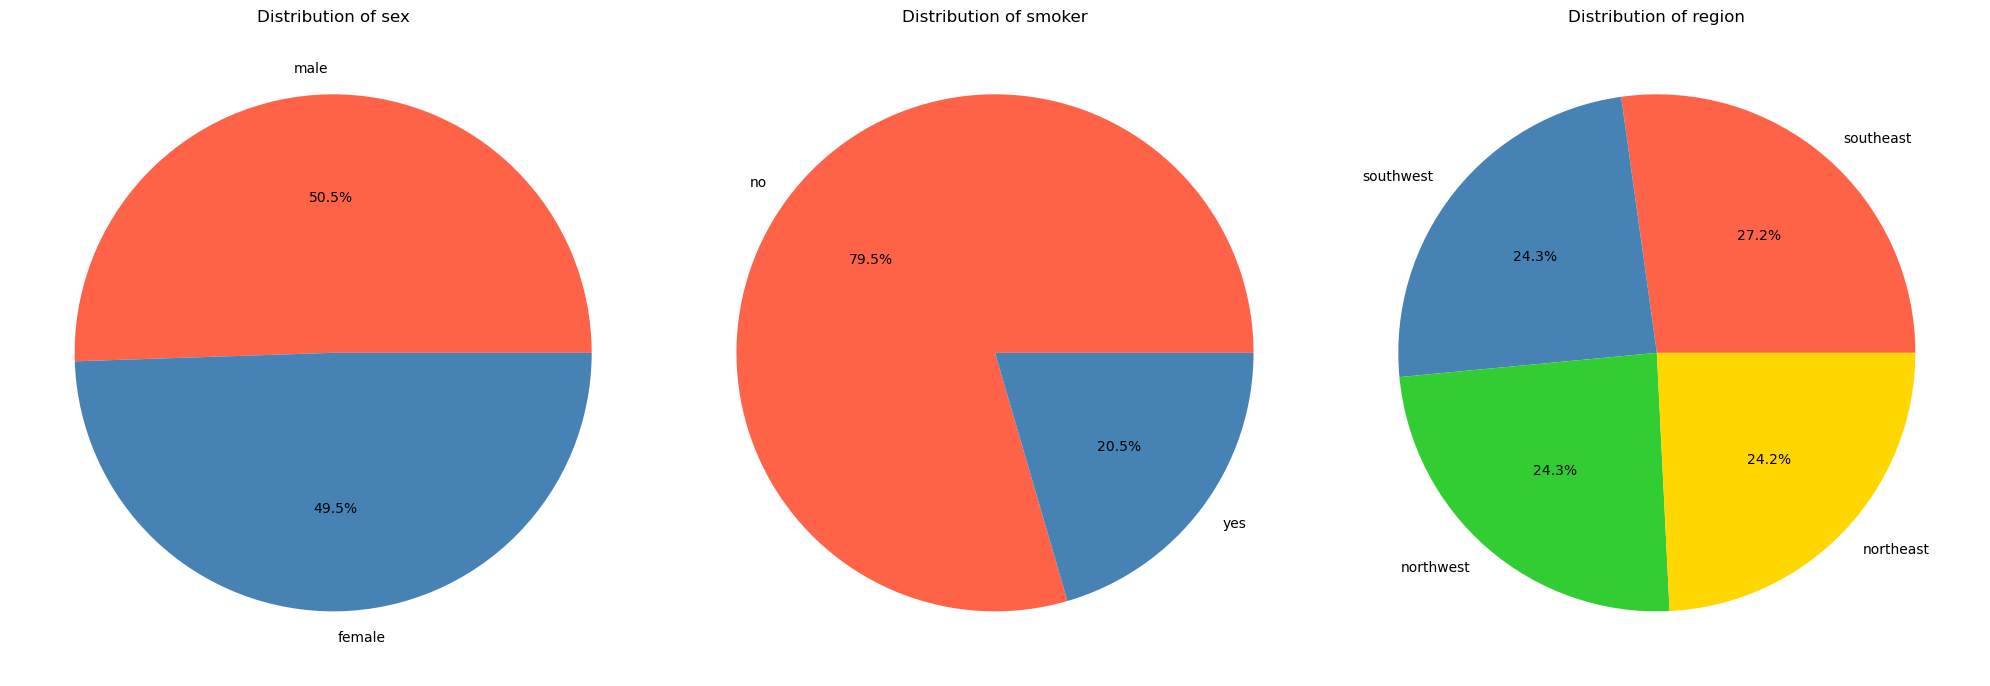

In [131]:
# features to plot (sex, smoker, region) and show in percent
feature = ['sex', 'smoker', 'region']
fig, axes = plt.subplots(1, 3, figsize = (20, 20))
custom_colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2']
# plot each feature
for i, col in enumerate(feature):
    ax = axes[i]
    x = df_read[col].value_counts()
    ax.pie(x.values, labels = x.index, autopct = '%1.1f%%', colors = custom_colors[:len(x)])
    ax.set_title(f'Distribution of {col}')


plt.tight_layout()
plt.show()

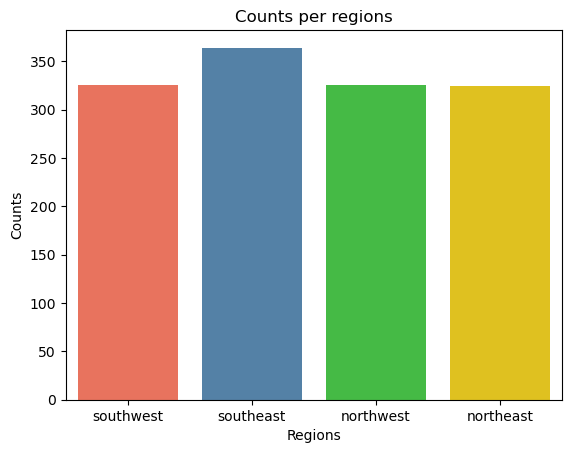

In [132]:
# count people per regions 
southwest = len(df_read[df_read['region'] == 'southwest'])
southeast = len(df_read[df_read['region'] == 'southeast'])
northwest = len(df_read[df_read['region'] == 'northwest'])
northeast = len(df_read[df_read['region'] == 'northeast'])

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']
sns.barplot(x = ['southwest', 'southeast', 'northwest', 'northeast'], y = [southwest, southeast, northwest, northeast], palette = colors)

plt.xlabel("Regions")
plt.ylabel("Counts")
plt.title("Counts per regions")
plt.show()

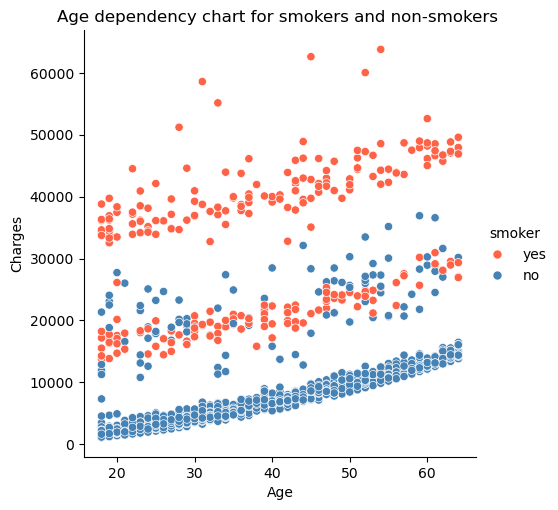

In [133]:
# plot relation of charges of smokers and non-smokers 
sns.relplot(x = 'age', y = 'charges', data = df_read, hue = 'smoker', palette = colors)  

plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age dependency chart for smokers and non-smokers ")
plt.show()

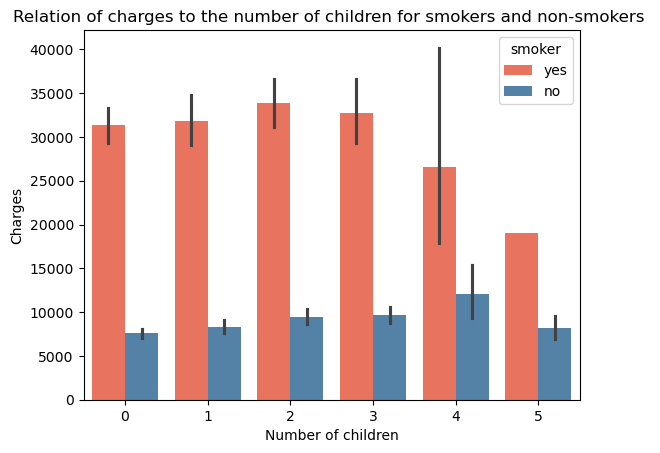

In [134]:
# plot relation of charges to the number od children for smokers and non-smokers 
sns.barplot(x = 'children', y = 'charges', data = df_read, hue = 'smoker', palette = colors)

plt.xlabel("Number of children")
plt.ylabel("Charges")
plt.title("Relation of charges to the number of children for smokers and non-smokers ")
plt.show()

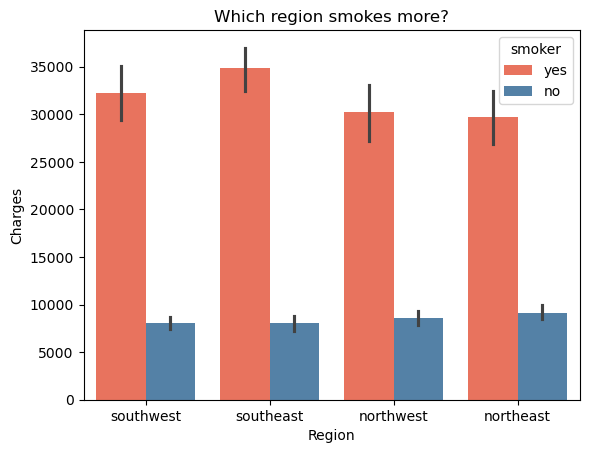

In [135]:
# plot charges of regions for smokers and non smokers
sns.barplot(x = 'region', y = 'charges', data = df_read, hue = 'smoker', palette = colors)  
plt.xlabel("Region")
plt.ylabel("Charges")
plt.title("Which region smokes more?")
plt.show()

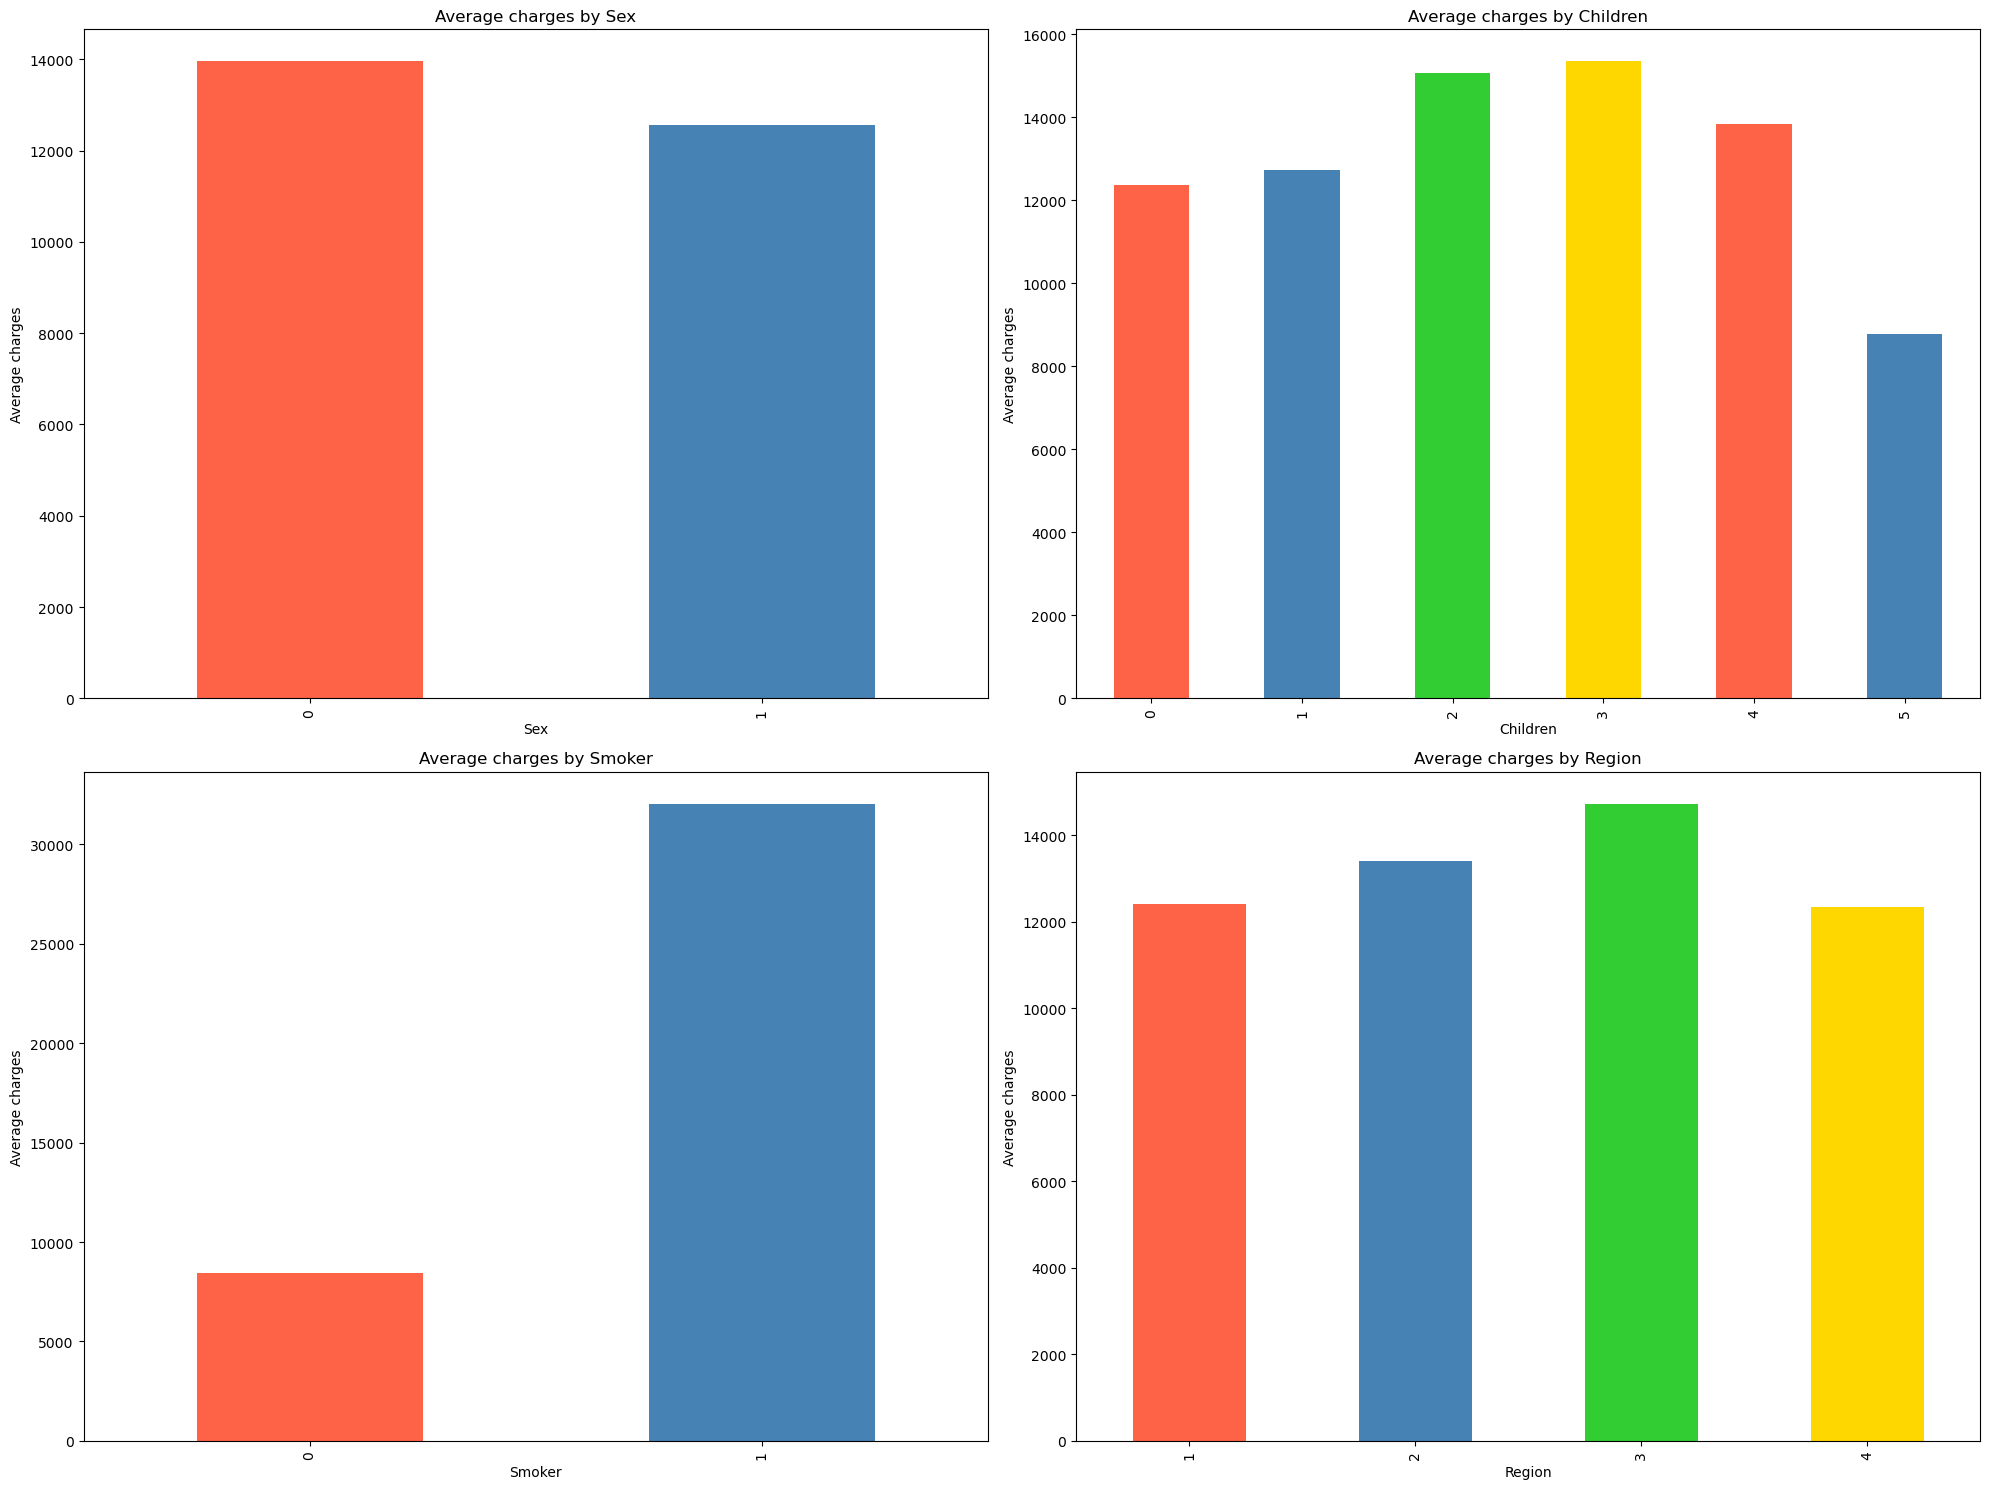

In [137]:
# plot averages of charges for each features
features = ['sex', 'children', 'smoker', 'region']
fig, axes = plt.subplots(2, 2, figsize = (20, 15))

for i, col in enumerate(features):
    ax = axes[i // 2, i % 2]
    df_grouped = df_copy.groupby(col).mean()['charges']
    df_grouped.plot.bar(ax = ax, color = colors)
    ax.set_title(f'Average charges by {col.capitalize()}')
    ax.set_ylabel('Average charges')
    ax.set_xlabel(col.capitalize())


plt.tight_layout()
plt.show()

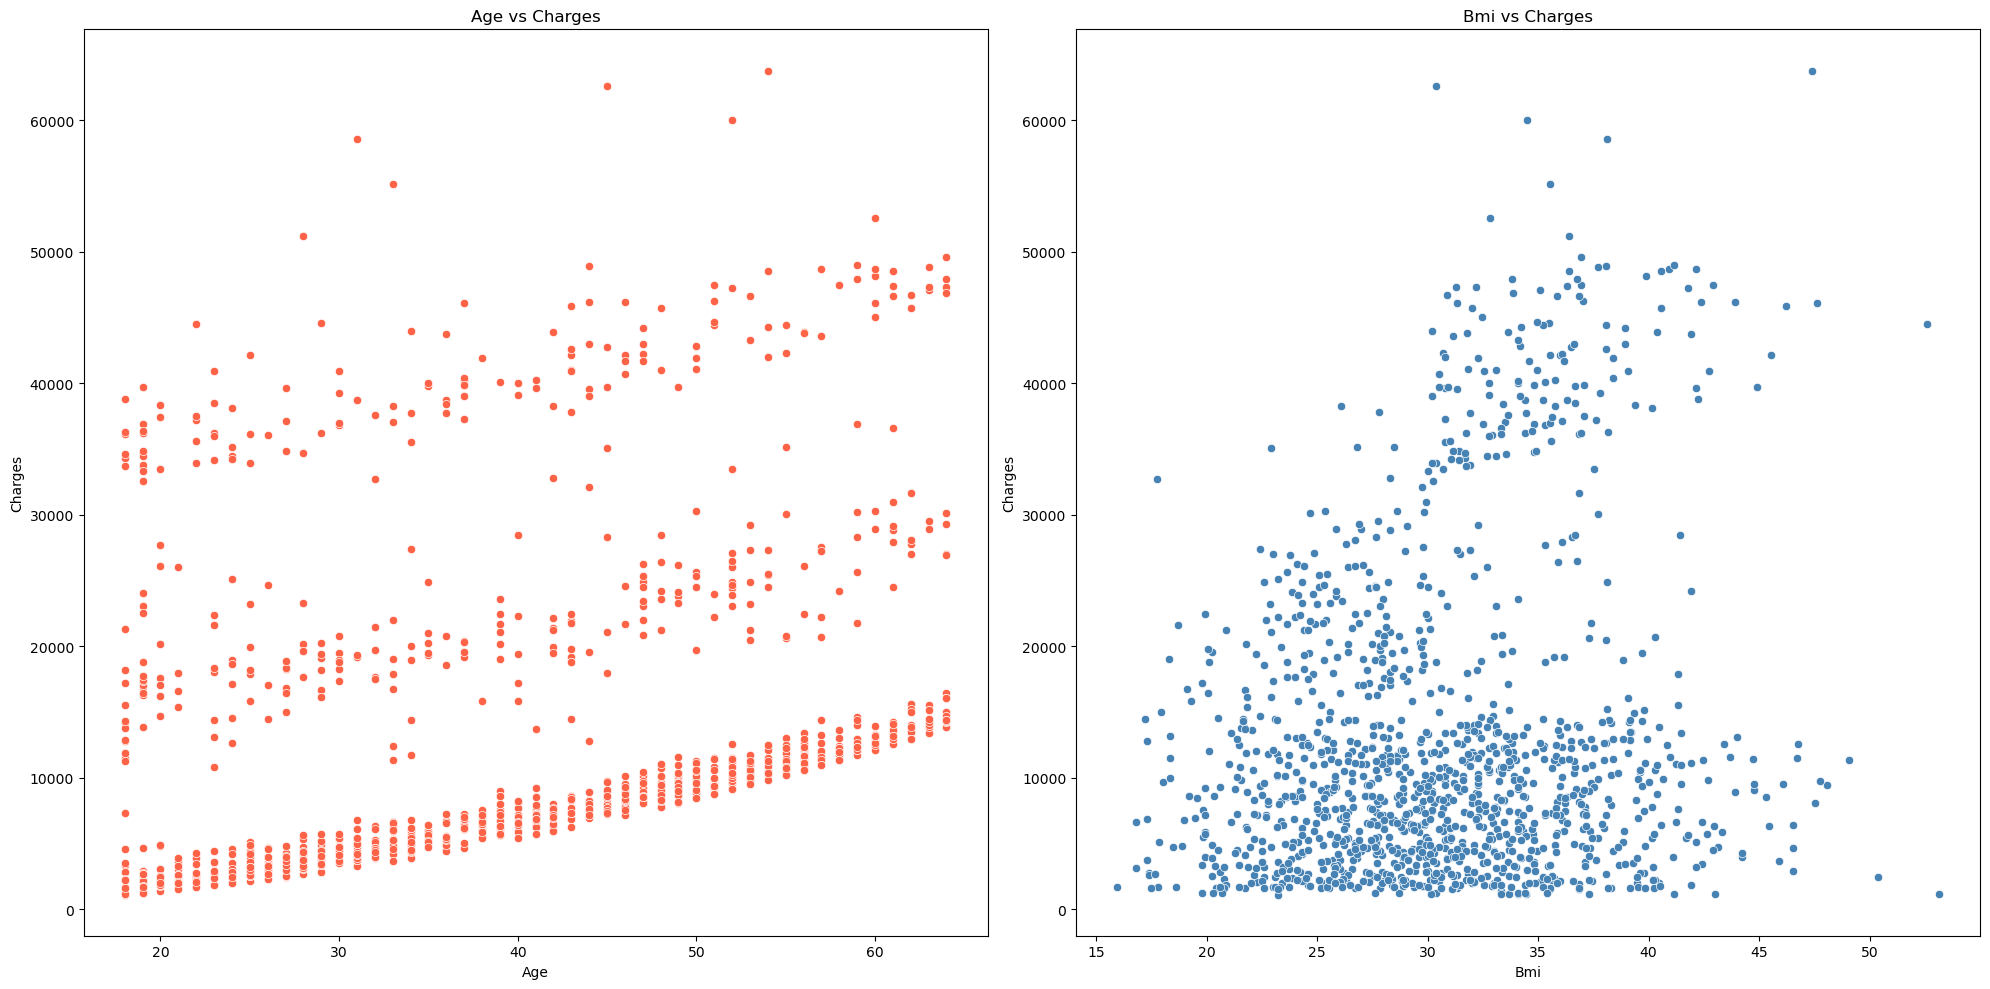

In [89]:
# plot relationship between age and charges, bmi and charges  
features = ['age', 'bmi']
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

for i, col in enumerate(features):
    sns.scatterplot(data = df_read, x = col, y = 'charges', color = colors[i], ax = axes[i])
    axes[i].set_title(f'{col.capitalize()} vs charges')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Charges')

plt.tight_layout()
plt.show()

In [138]:
# split data x - without charges , y - with charges 
X=df_read.drop('charges',axis=1)
y=df_read['charges']


In [139]:
# split data for the test and train set 
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2,random_state = 0)

In [140]:
# create two types of features 
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [141]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

# define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3, 4, 5],
    'regressor__learning_rate': [0.05, 0.1, 0.2]
}

In [142]:
# initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# fit the grid search
grid_search.fit(X_train, y_train)

# find best model
best_model = grid_search.best_estimator_

# output the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (MSE):", -grid_search.best_score_)

Best Parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
Best Cross-Validation Score (MSE): 21748244.601715676


In [143]:
# evaluate the best model on the test set
from sklearn.metrics import mean_absolute_error
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

# calculate MAE
test_mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", test_mae)

# calculate RMSE
test_rmse = test_mse ** 0.5
print("Test RMSE:", test_rmse)

Test MSE: 15699665.938375605
Test MAE: 2364.72900338771
Test RMSE: 3962.280396233412
